## 1) Plots in HI-MaNGA Data Paper 1 
* Emily Harrington did most of the hard work here
* I made the cross match with pipe3D

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from astropy.visualization import hist
%matplotlib notebook
from astropy.io import fits
import pandas as pd
from astropy.io import ascii
import pandas as pandas

In [2]:
mpl.style.use('default')
import mpl_style
plt.style.available
plt.style.use(mpl_style.style1)

SystemError: Parent module '' not loaded, cannot perform relative import

In [3]:
# import drp and dap, HI files
#DRPall = fits.open('drpall-v2_4_3.fits')
#DRPdata = DRPall[1].data
#DAPall = fits.open('dapall-v2_4_3-2.2.1.fits')
#DAPdata = DAPall[1].data
#mangaHIall = fits.open('mangaHIall.fits')
#HIdata = mangaHIall[1].data
#mangaHIall = fits.open('mangaHIall.fits')
#HIdata = mangaHIall[1].data
# import matching files created in topcat
#drpdapmatch = fits.open('drpdapmatch.fits')
#drp_dap = drpdapmatch[1].data
#HIdrpdap = fits.open('HI_drpdap.fits')
#HI_drpdap = HIdrpdap[1].data
#HIdrp = fits.open('HI_DRP.fits')
#HI_drp = HIdrpdap[1].data
HIpipe3d = fits.open('Pipe3D_v2_3_1_Match_MangaHIall_v1.fits')
HI_pipe3d = HIpipe3d[1].data
cols = HIpipe3d[1].columns
pipe3d_data=fits.open('manga.Pipe3D_v2_3_1.fits')
pipe3d=pipe3d_data[1].data

# alfalfa data
alfalfa_file = fits.open('alfalfa_drp_pipe3d.fits')
alfalfa = alfalfa_file[1].data


In [22]:
#help(HI_pipe3d)
#cols.info()
#print(HI_pipe3d['ellip'])
#ellipticicity^2 = 1 - (b/a)^2, so a/b = 1/sqrt(1-e^2)

In [16]:
good = np.where(HI_pipe3d["snr"] > 5)
weak = np.where(HI_pipe3d["logMHI"] > 0)
non = np.where(HI_pipe3d["logMHI"] < 0)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [5]:
# HI mass fraction (log M_HI - log Mstar) vs. stellar mass (as log Mstar)
HImassfrac = (HI_pipe3d["logMHI"][good] - HI_pipe3d["log_mass"][good])
#HImassfrac = (HIdata["logMHI"][goodind] - np.log10(HI_drpdap["nsa_sersic_mass"][goodind]))
#stellarmass = np.log10(HI_drpdap["nsa_sersic_mass"][goodind])
#stellarmass = HI_pipe3d["log_mass"][good]
#smass=stellarmass

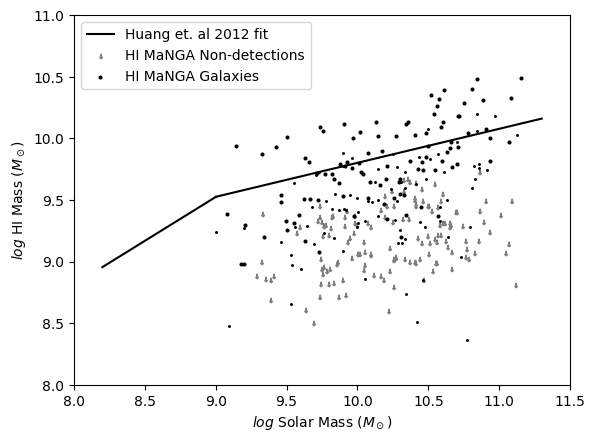

In [6]:
plt.figure(1)
lowmass = np.array([8.2,9])
highmass = np.array([9.00000001, 11.3])
f1 = 0.712 * lowmass + 3.117
f2 = 0.276* highmass +7.042
plt.plot(lowmass, f1, "black")
plt.plot(highmass, f2, "black", label = "Huang et. al 2012 fit")
plt.scatter(HI_pipe3d["log_mass"][non], HI_pipe3d["logHIlim200kms"][non], marker = r'$\downarrow$', s = 10, color = "grey", label = "HI MaNGA Non-detections")
plt.scatter(HI_pipe3d["log_mass"][weak], HI_pipe3d["logMHI"][weak], marker = ".", s = 5, color = "black")
plt.scatter(HI_pipe3d["log_mass"][good], HI_pipe3d["logMHI"][good], marker = ".", s = 15, color = "black", label = "HI MaNGA Galaxies")
plt.ylim(8,11)
plt.xlim(8,11.5)        
plt.xlabel("$log$ Solar Mass ($M_\odot$)")
plt.ylabel("$log$ HI Mass ($M_\odot$)")
plt.legend(loc='best')
plt.savefig('Huang_fit.png')

In [7]:
#MaNGA
#Mass Correction Mc = M*(a/b)^0.12
#ellipticicity^2 = 1 - (b/a)^2, so a/b = 1/sqrt(1-e^2)
HImass_good = np.log10(((10**HI_pipe3d["logMHI"][good]))*(1/np.sqrt(1-(HI_pipe3d["ellip"][good])**2))**.12)
HImass_weak = np.log10(((10**HI_pipe3d["logMHI"][weak]))*(1/np.sqrt(1-(HI_pipe3d["ellip"][weak])**2))**.12)
HImass_non = HI_pipe3d["logHIlim200kms"][non]

HImassfrac = HImass_good - HI_pipe3d["log_mass"][good]
HImassfrac2 = HImass_weak - HI_pipe3d["log_mass"][weak]
HImassfraclim = HImass_non - HI_pipe3d["log_mass"][non]

#ALFALFA
#Mass Correction
alf_HImass = ((10**alfalfa["logMH"]))*(1/np.sqrt(1-(alfalfa["ellip"])**2))**.12
alf_logHImass = np.log10(alf_HImass)
alfmassfrac = alf_logHImass - alfalfa["log_mass"]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


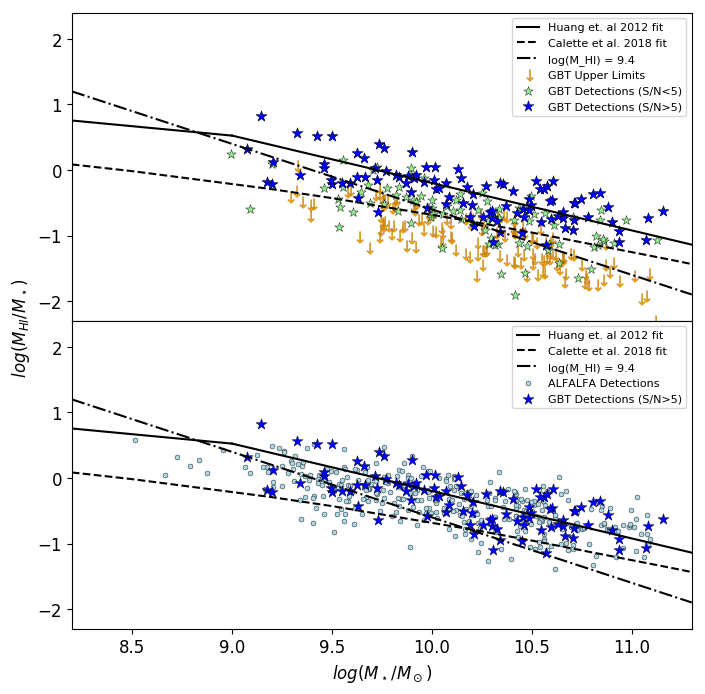

In [74]:
plt.rcParams.update({'font.size': 12})

plt.figure(5)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(8, 8))
plt.ylabel("                                                        $log(M_{HI}/M_\star)$")
plt.xlabel("$log(M_\star/M_\odot)$")

ax1.scatter(HI_pipe3d["log_mass"][non], HImassfraclim, marker = r'$\downarrow$', s = 70, color = "orange", linewidth=0.1, edgecolor="black", label = "GBT Upper Limits")
ax1.scatter(HI_pipe3d["log_mass"][weak], HImassfrac2, marker = "*", s = 50, color = "lightgreen", linewidth=0.3, edgecolor="black", label = "GBT Detections (S/N<5)")
ax1.scatter(HI_pipe3d["log_mass"][good], HImassfrac, marker = "*", s = 70, color = "blue", linewidth=0.3, edgecolor="black", label = "GBT Detections (S/N>5)")
lowmass = np.array([8.2,9])
highmass = np.array([9.00000001, 11.3])
f1 = 0.712 * lowmass + 3.117 - lowmass
f2 = 0.276* highmass +7.042 -highmass
mass = np.array([8.2,8.5,9.2,9.5,10.2,10.5,11.2,11.3])
f3 = np.log10(0.98/((10**(mass-9.24))**0.21 + (10**(mass-9.24))**0.67))
f4 = np.log10(0.02/((10**(mass-9.00))**0.00 + (10**(mass-9.00))**0.58))
f5 = 9.4*(mass/mass)-mass
ax1.plot(lowmass, f1, "black")
ax1.plot(highmass, f2, "black", label = "Huang et. al 2012 fit")
ax1.plot(mass,f3,"black",linestyle="--", label= "Calette et al. 2018 fit")
ax1.plot(mass,f5,"black",linestyle="-.", label= "log(M_HI) = 9.4")
#ax1.plot(mass,f4,"black",linestyle="-.", label= "Calette et al. 2018 fit")
ax1.legend(loc=1,fontsize = '8')

ax2.scatter(alfalfa["log_mass"], alfmassfrac, marker = ".", s = 50, color = "lightblue", linewidth=0.3, edgecolor="black", label = "ALFALFA Detections")
ax2.scatter(HI_pipe3d["log_mass"][good], HImassfrac, marker = "*", s = 70, color = "blue", linewidth=0.3, edgecolor="black", label = "GBT Detections (S/N>5)")
#ax2.scatter(HI_pipe3d["log_mass"][weak], HImassfrac2, marker = "*", s = 15, color = "black")
plt.ylim(-2.3,2.4)
plt.xlim(8.2,11.3)
ax2.plot(lowmass, f1, "black")
ax2.plot(highmass, f2, "black", label = "Huang et. al 2012 fit")
ax2.plot(mass,f3,"black",linestyle="--", label= "Calette et al. 2018 fit")
ax2.plot(mass,f5,"black",linestyle="-.", label= "log(M_HI) = 9.4")
#ax1.plot(mass,f4,"black",linestyle="-.", label= "Calette et al. 2018 ETG fit")

plt.subplots_adjust(wspace=0, hspace=0)
plt.legend(loc=1,fontsize = '8')
plt.savefig('MassFractionCrossMatch_2panel.png')

## Plot HI mass frac vs stellar mass

* 0.712($logM_*$)+3.117 , ($logM_*$) < 9
* 0.276($logM_*$)+7.042, ($logM_*$) > 9

I love this. Can you add over the line published in Huang et al. 2012 (ALFALFA), which is another good resource for looking at what people think should be correlated with HI mass.

Also a version with both HI-MaNGA and the match with ALFALFA would be amazing. My talk is Wed (Tue night for you) so if you can get it to me by then I can use it.

And to be really picky, I'd like to centre the data more in the plot, So manbe ylim=-3, 1.5 is better (use you aesthetic judgement - it's OK if a handful of points are out of the plot area - we should check those anyway for reliability).


# SFR vs Stellar Mass
* with detections over plotted

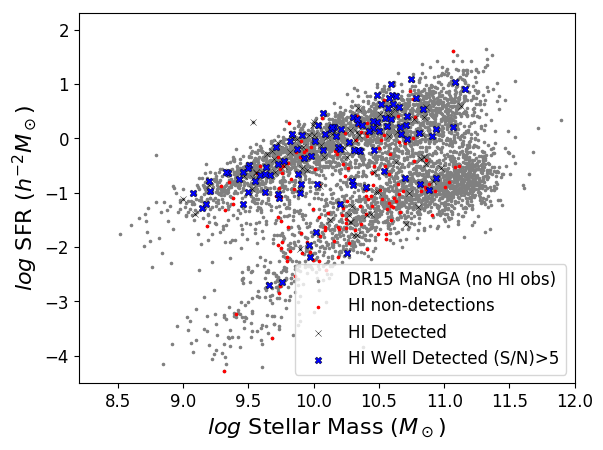

In [62]:
plt.scatter(pipe3d["log_mass"], pipe3d["log_sfr_ha"], marker = ".", s = 10, color = "grey", label = "DR15 MaNGA (no HI obs)")
plt.scatter(HI_pipe3d["log_mass"][non], HI_pipe3d["log_sfr_ha"][non], marker = ".", s = 10, color = "red", label = "HI non-detections")
plt.scatter(HI_pipe3d["log_mass"][weak], HI_pipe3d["log_sfr_ha"][weak], marker = "x", s = 20, color = "black" label = "HI Detected")
plt.scatter(HI_pipe3d["log_mass"][good], HI_pipe3d["log_sfr_ha"][good], marker = "X", s = 25, color = "blue", linewidth=0.3, edgecolor="black", label = "HI Well Detected (S/N)>5")
plt.xlabel("$log$ Stellar Mass ($M_\odot$)", fontsize = 16)
plt.ylabel("$log$ SFR ($h^{-2}M_\odot$)", fontsize = 16)
plt.xlim(8.2,12)
plt.ylim(-4.5,2.3)

plt.legend(loc='best')
plt.savefig('SFR_StellarMass.png')

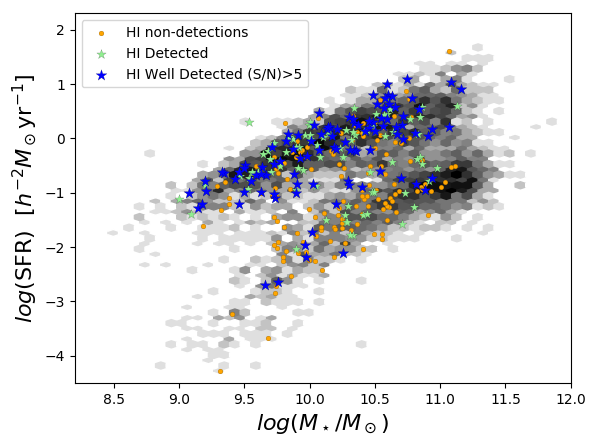

In [73]:
plt.rcParams.update({'font.size': 10})

plt.hexbin(pipe3d["log_mass"], pipe3d["log_sfr_ha"], gridsize=80, bins='log', cmap=plt.cm.Greys)
plt.scatter(HI_pipe3d["log_mass"][non], HI_pipe3d["log_sfr_ha"][non], marker = ".", s = 50, color = "orange",linewidth=0.1, edgecolor="black", label = "HI non-detections")
plt.scatter(HI_pipe3d["log_mass"][weak], HI_pipe3d["log_sfr_ha"][weak], marker = "*", s = 50, color = "lightgreen",linewidth=0.1, edgecolor="black", label = "HI Detected")
plt.scatter(HI_pipe3d["log_mass"][good], HI_pipe3d["log_sfr_ha"][good], marker = "*", s = 70, color = "blue",linewidth=0.1, edgecolor="black", label = "HI Well Detected (S/N)>5")
plt.xlabel("$log(M_\star/M_\odot)$", fontsize = 16)
plt.ylabel("$log$(SFR)  [$h^{-2}M_\odot$yr$^{-1}$]", fontsize = 16)
plt.xlim(8.2,12)
plt.ylim(-4.5,2.3)

plt.legend(loc=2)
plt.savefig('SFR_StellarMass.png',dpi=600)